In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sphere import *
from torus import *

=== 3D projection examples ===

point [3, 4, 5] on sphere with center [1, 1, 1] and radius 2:
projection: [1.74, 2.11, 2.49]
distance: 3.39
sphere: r=2.00, θ=42.0°, φ=56.3°

point [4, 3, 2] on ellipsoid with semi axes [3, 2, 1]:
projection: [3.38, 2.13, 0.76]
distance: 1.64

point [3, 2, 5] on cylinder:
projection: [1.20, 0.80, 4.40]
distance: 2.24



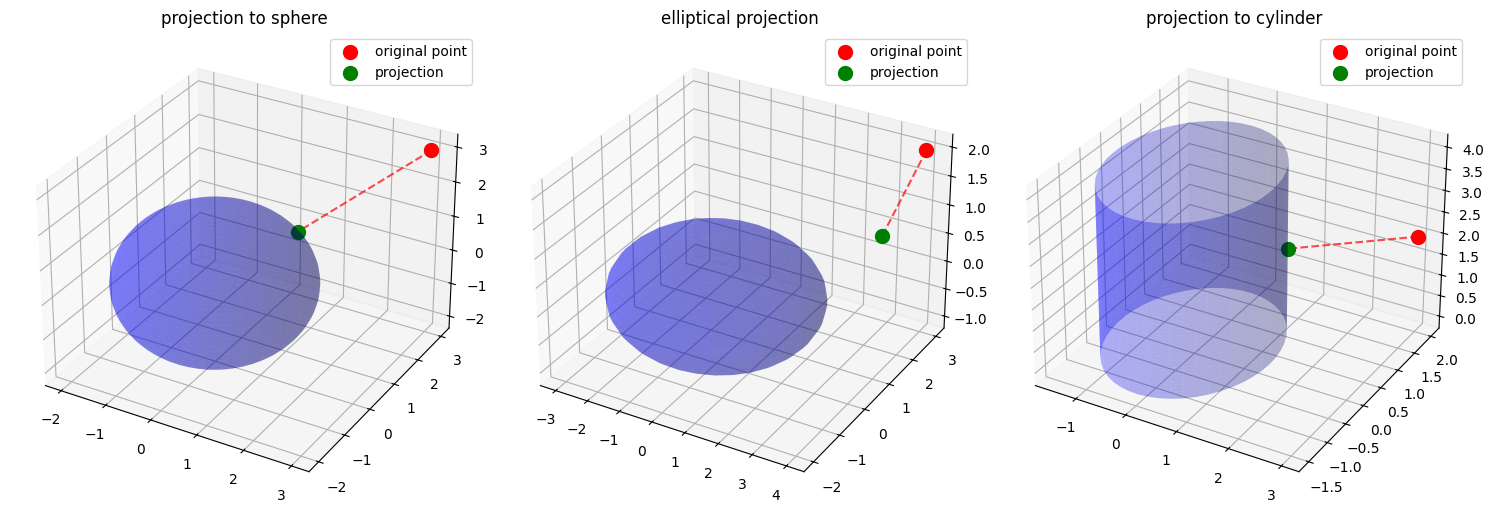

In [2]:
print("=== 3D projection examples ===\n")

# sphere
point = [3, 4, 5]
center = [1, 1, 1]
radius = 2

proj = project_to_sphere(point, center, radius)
distance = np.linalg.norm(np.array(point) - proj)

print(f"point {point} on sphere with center {center} and radius {radius}:")
print(f"projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
print(f"distance: {distance:.2f}")

# sphere
r, theta, phi = spherical_coordinates_from_cartesian(proj, center)
print(f"sphere: r={r:.2f}, θ={np.degrees(theta):.1f}°, φ={np.degrees(phi):.1f}°\n")

# ellipsoid
point = [4, 3, 2]
center = [0, 0, 0]
semi_axes = [3, 2, 1]

proj = project_to_ellipsoid(point, center, semi_axes)
distance = np.linalg.norm(np.array(point) - proj)

print(f"point {point} on ellipsoid with semi axes {semi_axes}:")
print(f"projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
print(f"distance: {distance:.2f}\n")

# cylinder
point = [3, 2, 5]
center = [0, 0, 0]
axis_direction = [0, 0, 1]
radius = 1.5
height = 4

proj = project_to_cylinder(point, center, axis_direction, radius, height)
distance = np.linalg.norm(np.array(point) - proj)

print(f"point {point} on cylinder:")
print(f"projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
print(f"distance: {distance:.2f}\n")

plot_3d_projections()

Projection onto Torus

Torus with center [0, 0, 0], major radius 3, minor radius 1

Point 1: [5, 2, 1]
  Projection: [3.64, 1.46, 0.39]
  Distance: 1.59
  Inside torus: No

Point 2: [2, 0, 0]
  Projection: [2.00, 0.00, 0.00]
  Distance: 0.00
  Inside torus: Yes

Point 3: [0, 0, 2]
  Projection: [3.00, 0.00, 1.00]
  Distance: 3.16
  Inside torus: No

Point 4: [1.5, 1.5, 0.5]
  Projection: [1.51, 1.51, 0.49]
  Distance: 0.01
  Inside torus: No

=== Slanted Torus ===
Point [3, 2, 4] on torus with axis [1, 0, 1]:
Projection: [2.39, 1.48, 2.80]
Distance: 1.44

=== Torus Information ===
Approximate Volume: 59.22
Surface Area: 118.44

=== Disk with Hole (CD) ===
Disk with outer radius 3, inner radius 1
Area: 25.13

Point 1: [2, 2, 1]
  Projection: [2.12, 2.12, 0.00]
  Distance: 1.01
  On disk: No

Point 2: [0.5, 0, 0.5]
  Projection: [1.00, 0.00, 0.00]
  Distance: 0.71
  On disk: No

Point 3: [4, 1, -0.5]
  Projection: [2.91, 0.73, 0.00]
  Distance: 1.23
  On disk: No

Point 4: [1.5, 1.5, 0]
  Projection: [2.12, 2.

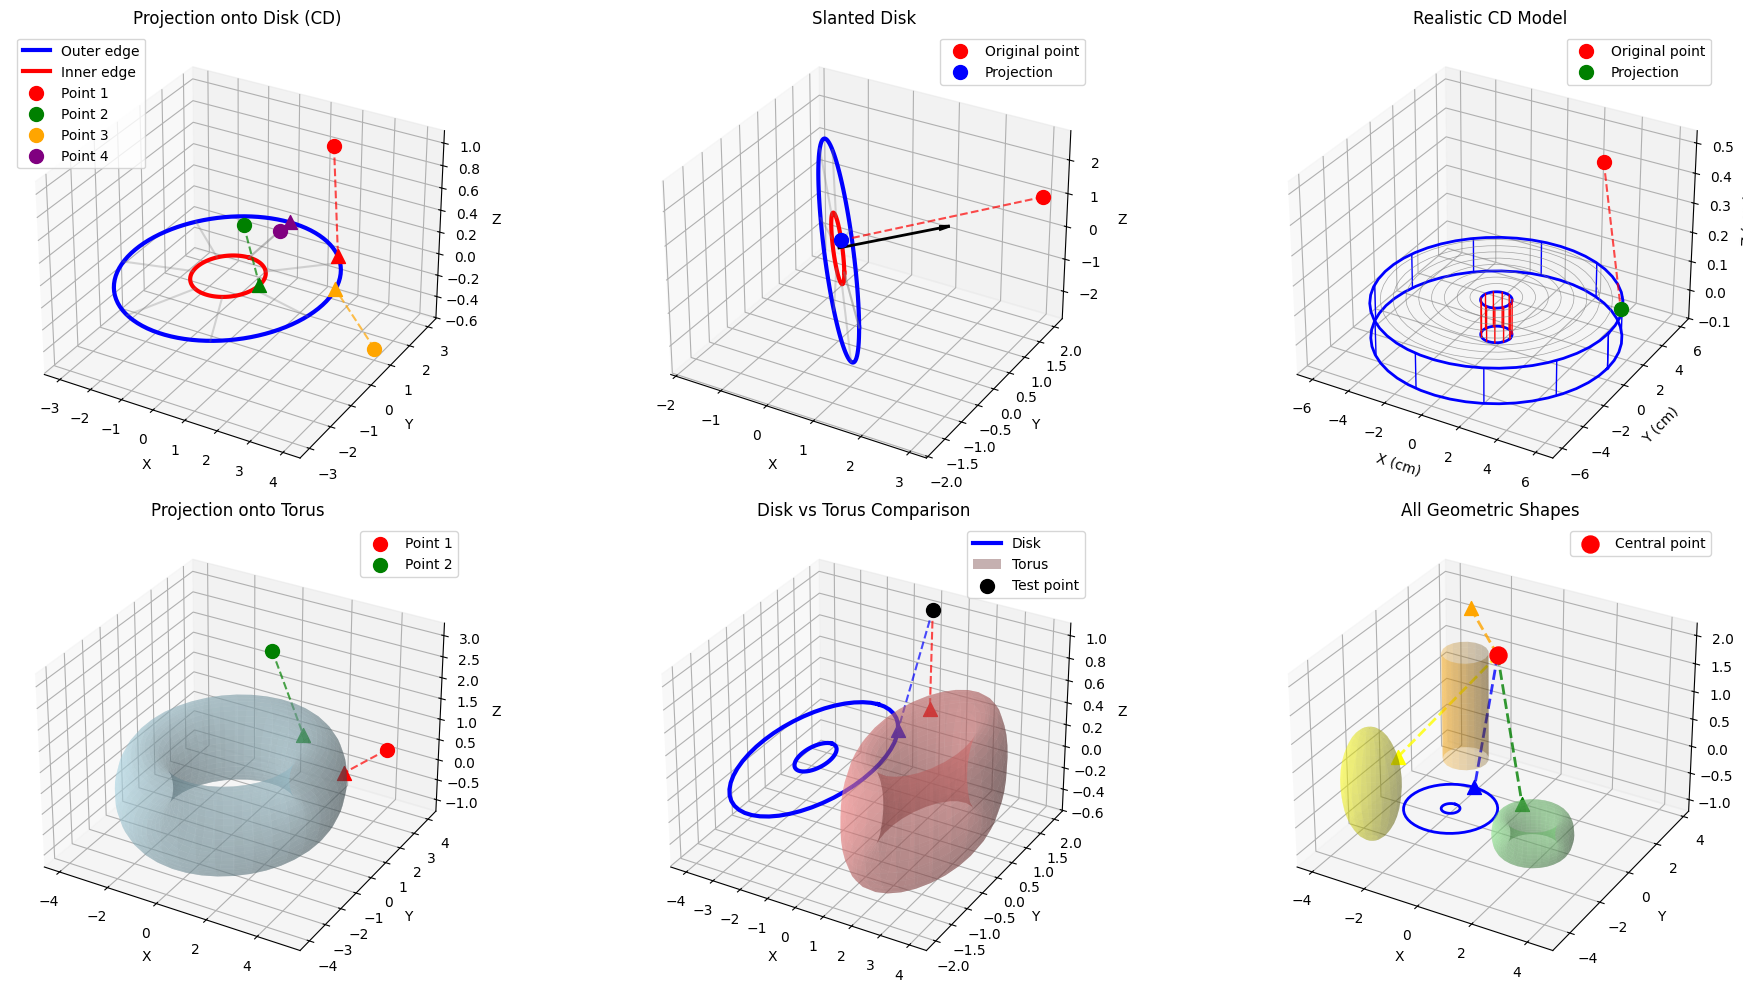

In [3]:


# Regular torus
center = [0, 0, 0]
major_radius = 3  # Major radius
minor_radius = 1  # Minor radius

test_points = [
    [5, 2, 1],    # Outside the torus
    [2, 0, 0],    # Near the surface
    [0, 0, 2],    # Above the center
    [1.5, 1.5, 0.5]  # Near the inner surface
]

print(f"Torus with center {center}, major radius {major_radius}, minor radius {minor_radius}\n")

for i, point in enumerate(test_points):
    proj = project_to_torus(point, center, major_radius, minor_radius)
    distance = np.linalg.norm(np.array(point) - proj)
    is_inside = torus_volume_inside(point, center, major_radius, minor_radius)

    print(f"Point {i+1}: {point}")
    print(f"  Projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
    print(f"  Distance: {distance:.2f}")
    print(f"  Inside torus: {'Yes' if is_inside else 'No'}")
    print()

# Slanted torus
print("=== Slanted Torus ===")
axis = [1, 0, 1]  # Slanted axis
point = [3, 2, 4]

proj = project_to_torus(point, center, major_radius, minor_radius, axis)
distance = np.linalg.norm(np.array(point) - proj)

print(f"Point {point} on torus with axis {axis}:")
print(f"Projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
print(f"Distance: {distance:.2f}")

print("\n=== Torus Information ===")
print(f"Approximate Volume: {2 * np.pi**2 * major_radius * minor_radius**2:.2f}")
print(f"Surface Area: {4 * np.pi**2 * major_radius * minor_radius:.2f}")

# Disk with hole example (CD)
print("\n=== Disk with Hole (CD) ===")
center = [0, 0, 0]
outer_radius = 3
inner_radius = 1
normal = [0, 0, 1]

test_points_disk = [
    [2, 2, 1],     # Above the disk
    [0.5, 0, 0.5], # Near the hole
    [4, 1, -0.5],  # Outside the disk
    [1.5, 1.5, 0]  # On the disk
]

print(f"Disk with outer radius {outer_radius}, inner radius {inner_radius}")
print(f"Area: {np.pi * (outer_radius**2 - inner_radius**2):.2f}")
print()

for i, point in enumerate(test_points_disk):
    proj = project_to_disk_with_hole(point, center, outer_radius, inner_radius, normal)
    distance = np.linalg.norm(np.array(point) - proj)
    on_disk = is_point_on_disk(point, center, outer_radius, inner_radius, normal)

    print(f"Point {i+1}: {point}")
    print(f"  Projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
    print(f"  Distance: {distance:.2f}")
    print(f"  On disk: {'Yes' if on_disk else 'No'}")
    print()

# Realistic CD model
print("\n=== Realistic CD Model ===")
cd_model = create_realistic_cd_model([0, 0, 0])

test_points_cd = [
    [3, 2, 0.5],    # Above the CD
    [7, 1, 0],      # Near the outer edge
    [0.5, 0, 0.1],  # Near the hole
    [4, 4, -0.2]    # Below the CD
]

print(f"CD Specifications:")
print(f"  Outer radius: {cd_model['outer_radius']} cm")
print(f"  Inner radius: {cd_model['inner_radius']} cm")
print(f"  Thickness: {cd_model['thickness']} mm")
print(f"  Volume: {cd_model['volume']:.2f} cubic cm")
print(f"  Surface area: {cd_model['surface_area']:.2f} square cm")
print()

for i, point in enumerate(test_points_cd):
    proj, surface_type, distance = project_to_thick_disk(
        point, cd_model['center'],
        cd_model['outer_radius'], cd_model['inner_radius'], cd_model['thickness']
    )

    print(f"Point {i+1}: {point}")
    print(f"  Projection: [{proj[0]:.2f}, {proj[1]:.2f}, {proj[2]:.2f}]")
    print(f"  Surface: {surface_type}")
    print(f"  Distance: {distance:.2f}")

plot_disk_and_torus_projection()

In [4]:
from multi_torus import *
# Run unit tests
print("=== Starting Multi-Torus Unit Tests ===")
#unittest.main(verbosity=2, exit=False)

# Run benchmark
run_performance_benchmark()

print("\n=== Tests Finished ===")

=== Starting Multi-Torus Unit Tests ===
=== Performance Benchmark ===
[ 8.55757635  1.5476169  -1.93637673] [ 1.73574149  0.5476159  -0.19581497]
[ 8.55757635  1.5476169  -1.93637673] [ 1.73574149  0.5476159  -0.19581497]
[ 8.55757635  1.5476169  -1.93637673] [ 5.61113189  0.85224303 -0.36799873]
[ 8.55757635  1.5476169  -1.93637673] [ 5.61113189  0.85224303 -0.36799873]
[-2.42280838  3.95538605 -6.91491064] [-2.33077322  3.09439415 -0.79211798]
[-2.42280838  3.95538605 -6.91491064] [-2.33077322  3.09439415 -0.79211798]
[-2.42280838  3.95538605 -6.91491064] [-0.46907671  2.20813355 -0.73646955]
[-2.42280838  3.95538605 -6.91491064] [-0.46907671  2.20813355 -0.73646955]
[ 3.15134005  0.96754588 -7.11249422] [ 1.184764    0.59817548 -0.76300875]
[ 3.15134005  0.96754588 -7.11249422] [ 1.184764    0.59817548 -0.76300875]
[ 3.15134005  0.96754588 -7.11249422] [ 4.1706324   1.82412351 -0.78286804]
[ 3.15134005  0.96754588 -7.11249422] [ 4.1706324   1.82412351 -0.78286804]
[-1.40160227  5.31

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Test torus function
u = np.linspace(0, 2*np.pi, 20)
v = np.linspace(0, 2*np.pi, 15)
U, V = np.meshgrid(u, v)

center = [0, 0, 0]
major_radius = 2
minor_radius = 0.8

X, Y, Z = torus_parametric(U, V, center, major_radius, minor_radius)

print("Test successful: array shapes:")
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")
print(f"Z.shape: {Z.shape}")

# Test projection
test_point = [3, 1, 1]
infinity_torus = create_infinity_shape_torus()

proj, idx = project_to_multiple_torus(test_point, infinity_torus, 'closest')
print(f"\nTest point: {test_point}")
print(f"Closest projection: {proj}")
print(f"Index of closest torus: {idx}")

Test successful: array shapes:
X.shape: (15, 20)
Y.shape: (15, 20)
Z.shape: (15, 20)
[3, 1, 1] [1.64994293 0.72998859 0.34407781]
[3 1 1] [1.64994293 0.72998859 0.34407781]
[3, 1, 1] [3.64282865 1.64282865 0.42672168]
[3 1 1] [3.64282865 1.64282865 0.42672168]

Test point: [3, 1, 1]
Closest projection: [3.64282865 1.64282865 0.42672168]
Index of closest torus: 1


"Practical Demo of Multi-Torus Projection"

Practical Demo of Multi-Torus Projection
=== Infinity Shape Demo ===
Test points and projection results:
------------------------------------------------------------

Point 1: [ 0.0,  0.0,  2.0]
[0, 0, 2] [0.  0.  0.8]
[0 0 2] [0.  0.  0.8]
[0, 0, 2] [0.0000000e+00 2.4492936e-16 8.0000000e-01]
[0 0 2] [0.0000000e+00 2.4492936e-16 8.0000000e-01]
  Closest → Torus 1
              [ 0.00,  0.00,  0.80]
              Distance: 1.200
[0, 0, 2] [0.  0.  0.8]
[0 0 2] [0.  0.  0.8]
[0, 0, 2] [0.0000000e+00 2.4492936e-16 8.0000000e-01]
[0 0 2] [0.0000000e+00 2.4492936e-16 8.0000000e-01]
  Weighted → [ 0.00,  0.00,  0.00]
              Distance: 2.000
              Weights: [0.50, 0.50]

Point 2: [ 0.0,  3.0,  0.0]
[0, 3, 0] [-0.44683945  2.32974082  0.        ]
[0 3 0] [-0.44683945  2.32974082  0.        ]
[0, 3, 0] [0.44683945 2.32974082 0.        ]
[0 3 0] [0.44683945 2.32974082 0.        ]
  Closest → Torus 1
              [-0.45,  2.33,  0.00]
              Distance: 0.806
[0, 3, 0] [-0.446

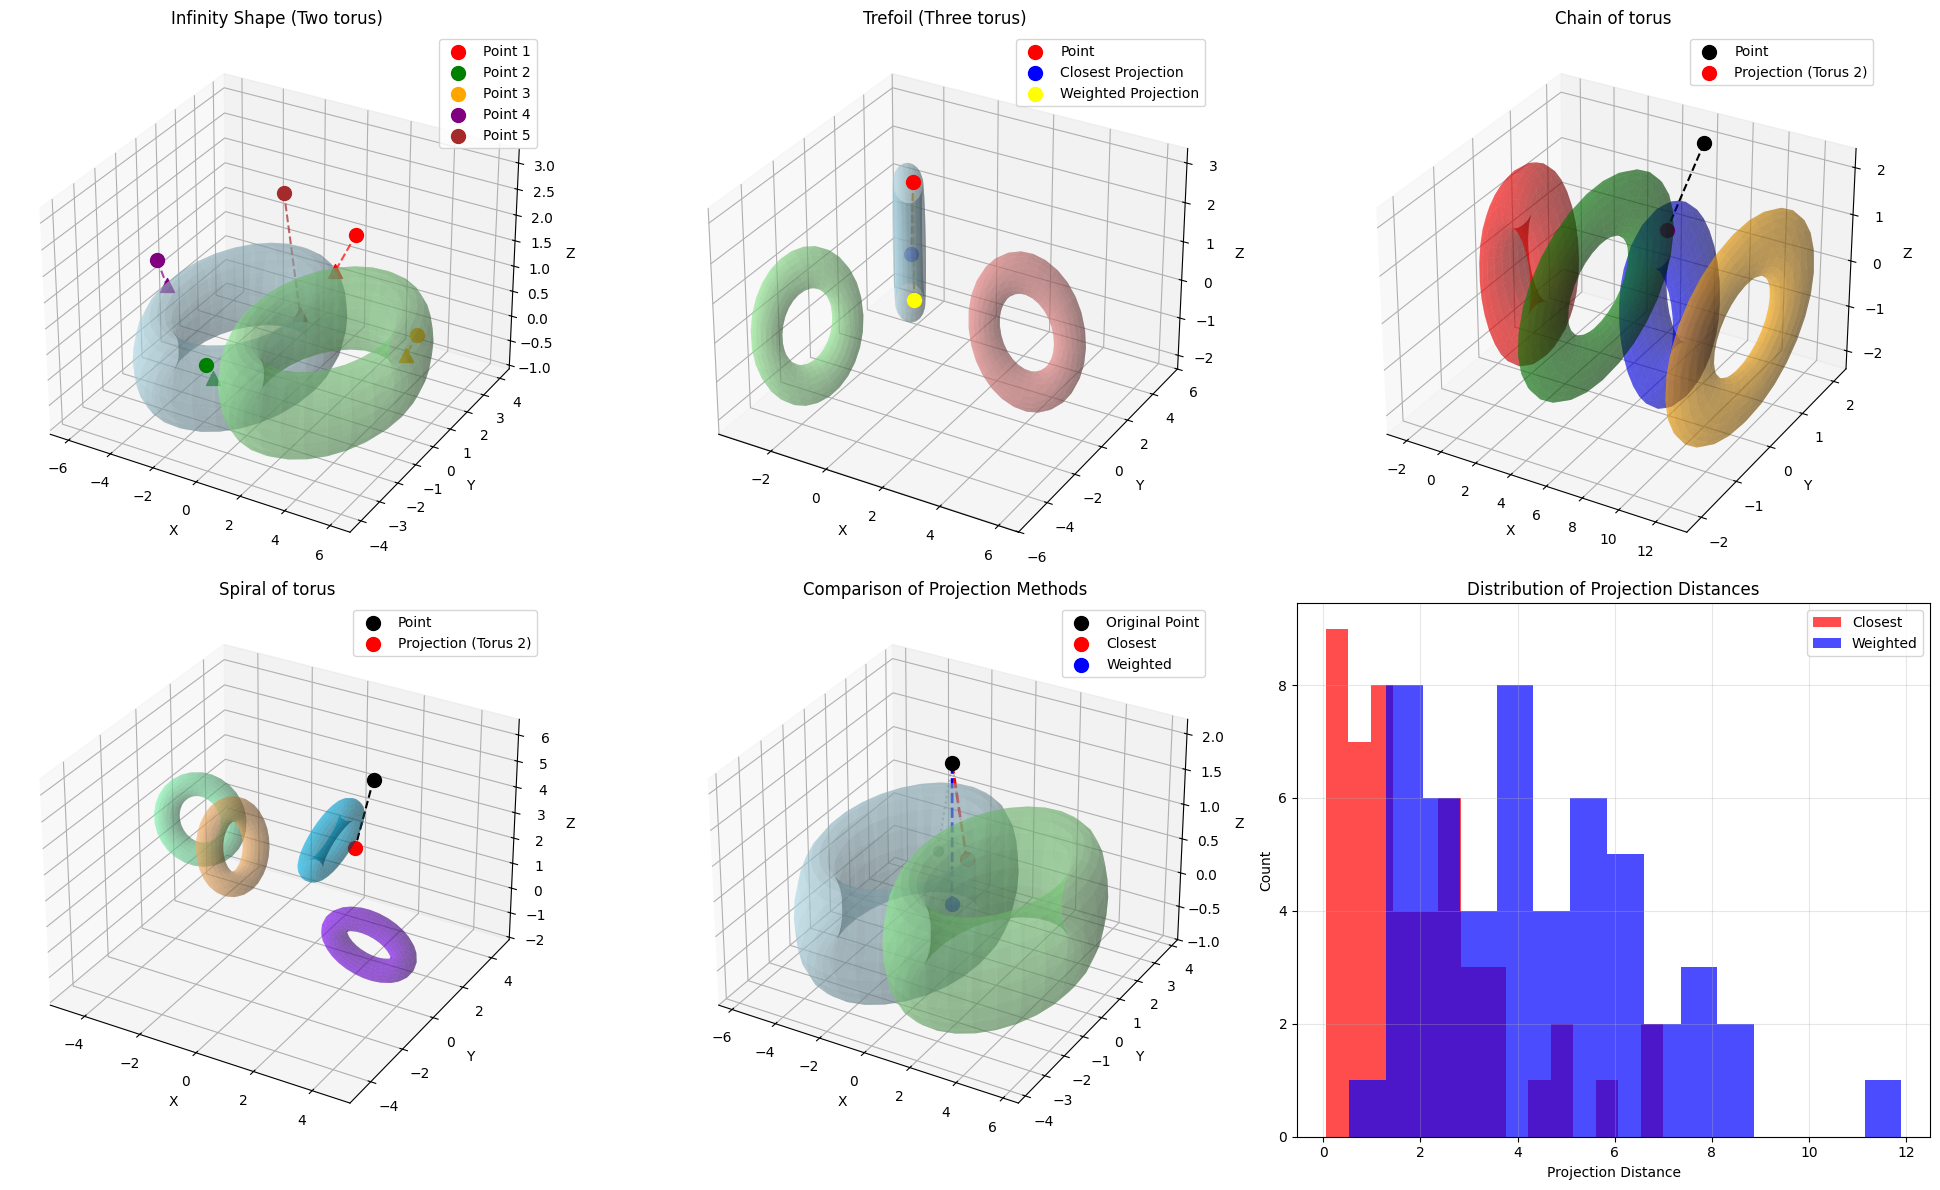

In [6]:

# Run demos
print("Practical Demo of Multi-Torus Projection")
print("=" * 60)

demo_infinity_projection()
demo_creative_shapes()
compare_projection_methods()
interactive_demo()
practical_application_demo()
plot_multi_torus_projection()


=== Multidimensional Projection Test ===

4D Point: [3, 2, 1, 4]
Projection (first three dimensions): [2.01723175 1.34482117 0.26433963 4.        ]
Distance: 1.392

Projection (dimensions 0,2,3): [2.02972157 2.         0.67657386 0.48014137]
Distance: 3.665

6D Point: [5, 3, 2, 1, 4, 2]
6D Projection: [2.0950554  1.25703324 0.23139599 1.         4.         2.        ]
Distance: 3.822

=== Comparison of Different Methods ===
First three dimensions: Distance = 2.806
Dimensions 0,1,4: Distance = 2.362
Dimensions 1,2,3: Distance = 4.451




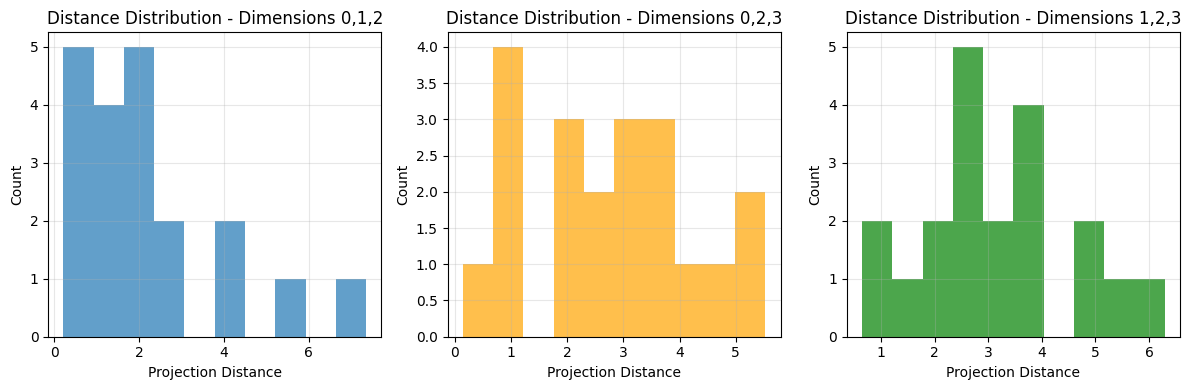

=== Comparative Statistics ===
Average Distance - Dimensions 0,1,2: 2.221
Average Distance - Dimensions 0,2,3: 2.718
Average Distance - Dimensions 1,2,3: 3.141


In [7]:
from extended_torus import *

test_high_dimensional()
print("\n" + "="*50 + "\n")
plot_dimension_comparison()

=== Multi-dimensional Torus Test ===

4D Torus with radii [2, 1.5, 1, 0.8]
Center: [0, 0, 0, 0]

Point 1: [3, 2, 1, 0.5]
  Projection: [2.  1.5 1.  0.8]
  Projection distance: 1.158
  Distance to surface: 1.158
  Inside torus: No

Point 2: [1, 1, 1, 1]
  Projection: [2.  1.5 1.  0.8]
  Projection distance: 1.136
  Distance to surface: 1.136
  Inside torus: No

Point 3: [0, 0, 0, 0]
  Projection: [2.  1.5 1.  0.8]
  Projection distance: 2.809
  Distance to surface: 2.809
  Inside torus: Yes

Point 4: [5, 3, 2, 1]
  Projection: [2.  1.5 1.  0.8]
  Projection distance: 3.506
  Distance to surface: 3.506
  Inside torus: No

Point 5: [1, 0.5, 0.2, 0.1]
  Projection: [2.  1.5 1.  0.8]
  Projection distance: 1.769
  Distance to surface: 1.769
  Inside torus: Yes

=== Different Dimensions Test ===
6D Point: [2.5, 1.2, 0.8, 0.6, 3.0, 1.5]
Projection on 4D Torus: [2.  1.5 1.  0.8 3.  1.5]
2D Point: [3, 2]
Projection on 4D Torus: [2.  1.5]




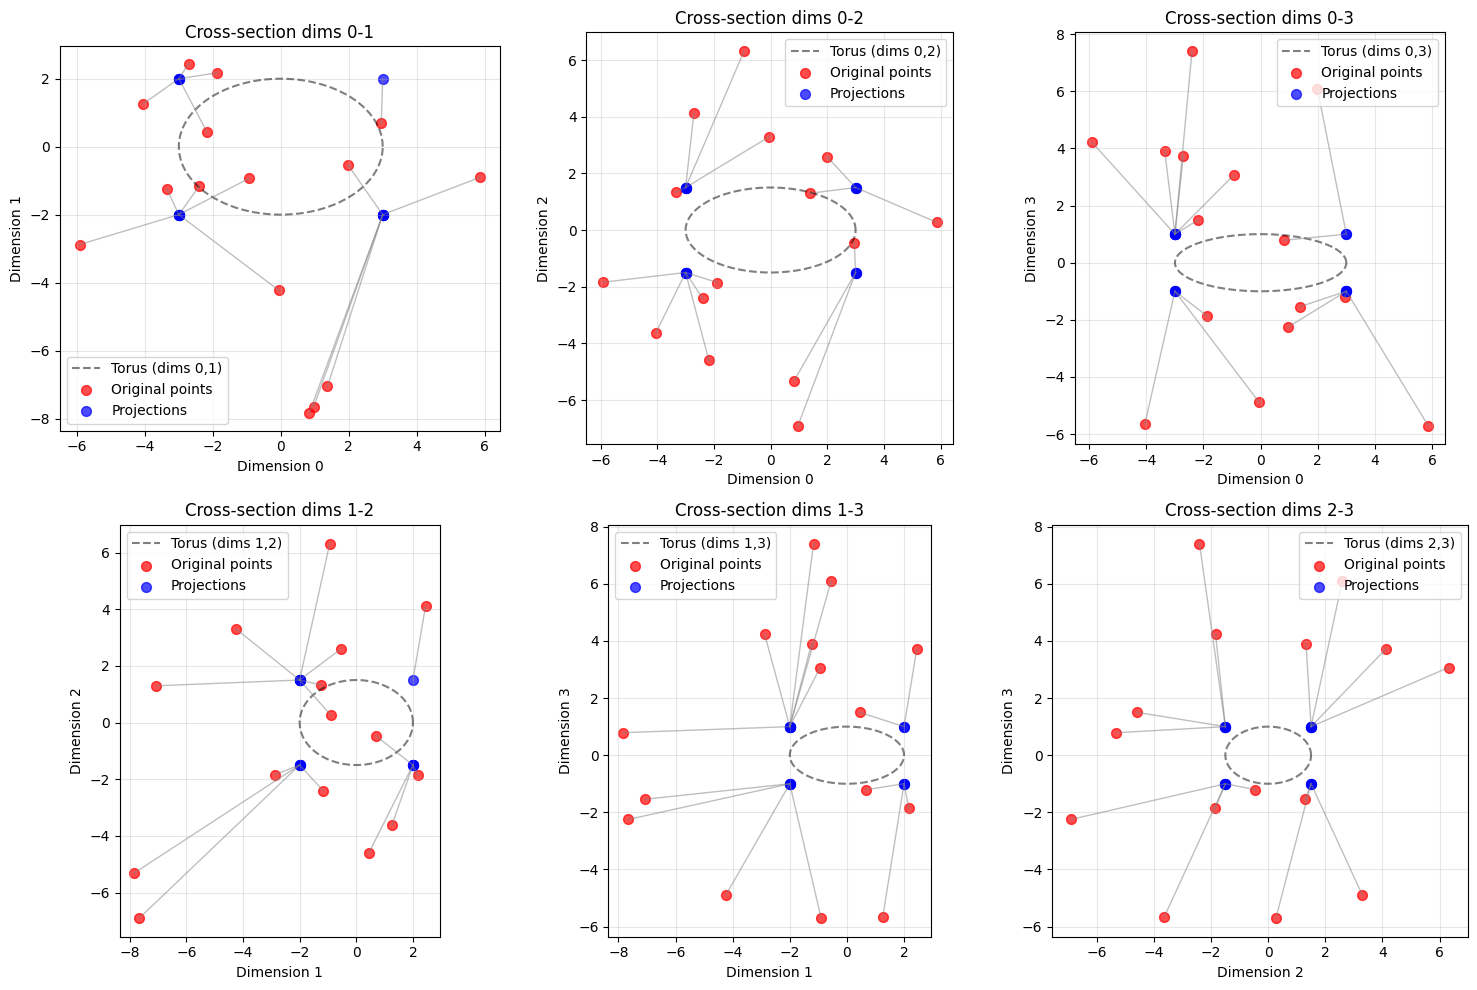

=== Projection Statistics ===
Average projection distance: 4.889
Maximum distance: 8.173
Minimum distance: 1.469


=== Method Comparison ===

Original point: [4, 3, 2, 1, 2.5]
Center: [0, 0, 0, 0, 0]

3D Torus method (first dimensions):
  Projection: [2.62469505 1.96852129 0.62469505 1.         2.5       ]
  Distance: 2.202

5D Hyper-torus method:
  Projection: [2.5 2.  1.5 1.2 1. ]
  Distance: 2.406

Hyper-torus is worse than 3D torus


In [8]:
from hyper_torus import *

test_hyper_torus()
print("\n" + "="*60 + "\n")
visualize_hyper_torus_projections()
print("\n" + "="*60 + "\n")
compare_methods()